In [1]:
from newsapi import NewsApiClient
import csv
import pandas as pd
import datetime
from textblob import TextBlob
from dateutil import parser
api = NewsApiClient(api_key='245b88d92bbc448597e24c7643f86d1d')

In [2]:
today = datetime.date.today()
max_days = today - datetime.timedelta(days=30)

In [3]:
all_articles = api.get_everything(q='tesla',
                                 sources= 'bbc-news, metro ,financial-times, buisness-insider, reuters, bloomberg, cnbc, cbc-news,fortune',
                                 from_param=max_days,
                                 sort_by='relevancy',
                                 page_size=100,
                                 language='en',
                                 )

In [4]:
all_articles

{'status': 'ok',
 'totalResults': 251,
 'articles': [{'source': {'id': 'bloomberg', 'name': 'Bloomberg'},
   'author': None,
   'title': 'Elon Musk, Tesla and California: Is the Love Affair Souring? - Bloomberg',
   'description': 'Elon Musk, Tesla and California: Is the Love Affair Souring?\xa0\xa0BloombergView Full Coverage on Google News',
   'url': 'https://www.bloomberg.com/tosv2.html?vid=&uuid=fd13fc10-9e02-11ea-8a63-35163535c930&url=L25ld3MvYXJ0aWNsZXMvMjAyMC0wNS0yNC9sb2NrZG93bi1zdHJhaW5zLWFub3RoZXItcm9tYW5jZS1jYWxpZm9ybmlhLWFuZC1lbG9uLW11c2s=',
   'urlToImage': None,
   'publishedAt': '2020-05-24T16:25:30Z',
   'content': None},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Reuters Editorial',
   'title': 'California governor to look into Tesla reopening in defiance of health order',
   'description': 'California Governor Gavin Newsom said both he and local health officials would speak to officials at Tesla Inc, after the company ordered workers back on the j

In [5]:
news = pd.DataFrame(all_articles['articles'])

In [6]:
news_filtered = news[news['description'].notnull()]

In [7]:
news_filtered['polarity'] = news_filtered.apply(lambda x: TextBlob(x['description']).sentiment.polarity, axis=1)
news_filtered['subjectivity'] = news_filtered.apply(lambda x: TextBlob(x['description']).sentiment.subjectivity, axis=1)

news_filtered['date'] = news_filtered.apply(lambda x: parser.parse(x['publishedAt']).strftime('%Y, %m, %d'), axis=1)
news_filtered['time'] = news_filtered.apply(lambda x: parser.parse(x['publishedAt']).strftime('%H, %M'), axis=1)

c:\users\hayes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\hayes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hayes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [8]:
news_filtered

,source,author,title,description,url,urlToImage,publishedAt,content,polarity,subjectivity,date,time
0,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,"Elon Musk, Tesla and California: Is the Love A...","Elon Musk, Tesla and California: Is the Love A...",https://www.bloomberg.com/tosv2.html?vid=&uuid...,None,2020-05-24T16:25:30Z,None,0.425000,0.575000,"2020, 05, 24","16, 25"
1,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Editorial,California governor to look into Tesla reopeni...,California Governor Gavin Newsom said both he ...,https://www.reuters.com/article/us-health-coro...,https://s4.reutersmedia.net/resources_v2/image...,2020-05-11T20:05:29Z,"SACRAMENTO, Calif. (Reuters) - California Gove...",0.000000,0.000000,"2020, 05, 11","20, 05"
2,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,Musk Foils Tesla Claim It’s Handled Covid-19 L...,<ol><li>Musk Foils Tesla Claim It’s Handled Co...,https://www.bloomberg.com/tosv2.html?vid=&uuid...,None,2020-05-11T01:32:29Z,None,0.000000,0.000000,"2020, 05, 11","01, 32"
3,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Editorial,Elon Musk's SpaceX raises $346 million ahead o...,Elon Musk's SpaceX said on Tuesday that it rai...,https://www.reuters.com/article/us-spacex-laun...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-05-26T16:33:14Z,(Reuters) - Elon Musk’s SpaceX said on Tuesday...,-0.015909,0.213636,"2020, 05, 26","16, 33"
4,"{'id': 'reuters', 'name': 'Reuters'}",Rebecca Spalding,Large employers push back on U.S. healthcare m...,A group representing some of the largest U.S. ...,https://www.reuters.com/article/us-health-coro...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-05-23T00:54:44Z,(Reuters) - A group representing some of the l...,0.000000,0.000000,"2020, 05, 23","00, 54"
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Editorial,Tesla seeks China nod to build Model 3 vehicle...,Tesla Inc is seeking\nChinese government appro...,https://www.reuters.com/article/tesla-china-id...,https://s4.reutersmedia.net/resources_v2/image...,2020-05-23T09:28:46Z,"BEIJING, May 23 (Reuters) - Tesla Inc is seeki...",0.000000,0.000000,"2020, 05, 23","09, 28"
96,"{'id': 'reuters', 'name': 'Reuters'}",Joey Roulette,"Musk's SpaceX set for debut astronaut mission,...",Entrepreneur Elon Musk's SpaceX is set to laun...,https://www.reuters.com/article/us-space-explo...,https://s1.reutersmedia.net/resources/r/?m=02&...,2020-05-26T11:07:34Z,"CAPE CANAVERAL, Fla. (Reuters) - Entrepreneur ...",-0.025000,0.050000,"2020, 05, 26","11, 07"
97,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Editorial,Tesla can prepare to reopen U.S. plant in Cali...,Tesla Inc can take additional\nsteps ahead of ...,https://www.reuters.com/article/health-coronav...,https://s4.reutersmedia.net/resources_v2/image...,2020-05-13T12:58:14Z,May 13 (Reuters) - Tesla Inc can take addition...,0.000000,1.000000,"2020, 05, 13","12, 58"
98,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Editorial,Tom Cruise aims higher with movie shot on spac...,Action star Tom Cruise is working on a movie s...,https://www.reuters.com/article/us-people-tom-...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-05-05T20:56:30Z,LOS ANGELES (Reuters) - Action star Tom Cruise...,0.100000,0.100000,"2020, 05, 05","20, 56"


In [9]:
news_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   source        74 non-null     object 
 1   author        69 non-null     object 
 2   title         74 non-null     object 
 3   description   74 non-null     object 
 4   url           74 non-null     object 
 5   urlToImage    71 non-null     object 
 6   publishedAt   74 non-null     object 
 7   content       67 non-null     object 
 8   polarity      74 non-null     float64
 9   subjectivity  74 non-null     float64
 10  date          74 non-null     object 
 11  time          74 non-null     object 
dtypes: float64(2), object(10)
memory usage: 7.5+ KB


In [10]:
news_filtered.groupby(by='date').mean()

,polarity,subjectivity
date,,
"2020, 04, 29",-0.033854,0.272396
"2020, 04, 30",-0.027024,0.369643
"2020, 05, 01",-0.034061,0.468909
"2020, 05, 02",-0.025000,0.175000
"2020, 05, 04",0.160000,0.540000
"2020, 05, 05",0.083468,0.337239
"2020, 05, 06",0.117083,0.369167
"2020, 05, 07",0.215278,0.583333
"2020, 05, 08",0.111111,0.250000


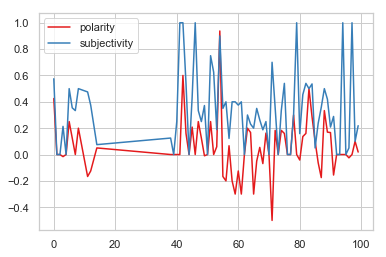

In [12]:
import seaborn as sns
sns.set(style='whitegrid', palette='Set1')
news_filtered.plot(sharey = True)